<a href="https://colab.research.google.com/github/HamzaWajid1/Whatsapp_chat_finetuned_chatbot/blob/main/Whatsapp_chat_analysis_with_chatbot_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whatstk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 887.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 81.4 MB/s eta 0:00:00
  Created wheel for whatstk: filename=whatstk-0.6.2-py3-none-any.whl size=60396 sha256=6d086129165937d1e00b6048fcc2b85e5f823e48ab3b8eefbe4d78d580e2c1fd
  Stored in directory: /root/.cache/pip/wheels/62/1e/f2/69386e57a388ed2a9f8e19db1cc95ccd735dd6a521dd686b00
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=512d60cf0d89e21af493d1cb7ba8b014761bd1c1b65c68a2c6d7f7e544101ac6
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built whatstk emoji
  Attempting uninstall: plotly
    Found exi

In [2]:
%pip install heatmap

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
%pip install seaborn

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
#import heatmap
#from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

In [2]:
from whatstk import WhatsAppChat
from whatstk.data import whatsapp_urls
chat = WhatsAppChat.from_source(filepath='/content/chat_with_affan.txt')


In [3]:
df=chat.df

In [4]:
df

,date,username,message
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:..."
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call
...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj..."
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj..."
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>


In [5]:
print(f"start date:{chat.start_date}\nend date:{chat.end_date}")

start date:2021-09-22 08:50:00
end date:2023-12-05 11:09:00


In [6]:
chat.users

['Affan Ali Giki', 'Hamza Wajid']

In [7]:
import pandas as pd

In [8]:
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time


In [ ]:
#df=df.drop('date',axis=1)

In [9]:
df

,date,username,message,Dates,Time
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00
...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00


In [10]:
df.shape

(443, 5)

In [11]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}

In [12]:
df['day']=df['date'].dt.weekday.map(weeks)

In [13]:
df

,date,username,message,Dates,Time,day
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday
...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday


In [14]:
df['letters']=df['message'].apply(lambda s: len(s))
df

,date,username,message,Dates,Time,day,letters
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778 Saadullah,2021-09-24,11:31:00,Friday,20
3,2021-09-24 11:32:00,Hamza Wajid,"Thanks yaar 9/26/21, 2:29 PM - Affan Ali Giki:...",2021-09-24,11:32:00,Friday,1584
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17
...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,"Nhi to na lagao 11/15/23, 12:46 PM - Hamza Waj...",2023-11-15,08:16:00,Wednesday,435
439,2023-11-27 11:18:00,Affan Ali Giki,"Missed voice call 12/2/23, 7:21 PM - Hamza Waj...",2023-11-27,11:18:00,Monday,303
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15


In [15]:
df['Cleaned_Message'] = df['message'].apply(lambda x: re.sub(r'^.*?-\s', '', x))
df['Cleaned_Message'] = df['message'].apply(lambda x: x.split('\n', 1)[0])

In [16]:
df[55:75]

,date,username,message,Dates,Time,day,letters,Cleaned_Message
55,2021-12-20 10:26:00,Hamza Wajid,Oh ho,2021-12-20,10:26:00,Monday,5,Oh ho
56,2021-12-20 10:26:00,Hamza Wajid,Phir rola hai,2021-12-20,10:26:00,Monday,13,Phir rola hai
57,2021-12-20 10:26:00,Affan Ali Giki,Chalo dekhte hai,2021-12-20,10:26:00,Monday,16,Chalo dekhte hai
58,2021-12-20 10:26:00,Affan Ali Giki,Ph ka sir kuch kehta to nahi wese,2021-12-20,10:26:00,Monday,33,Ph ka sir kuch kehta to nahi wese
59,2021-12-20 10:26:00,Hamza Wajid,Dekhtaa hoo,2021-12-20,10:26:00,Monday,11,Dekhtaa hoo
60,2021-12-20 10:26:00,Hamza Wajid,Laikin wada nhi kar raha,2021-12-20,10:26:00,Monday,24,Laikin wada nhi kar raha
61,2021-12-20 10:26:00,Affan Ali Giki,"Ok 12/22/21, 8:43 PM - Hamza Wajid: Yaar abhi ...",2021-12-20,10:26:00,Monday,62,Ok
62,2021-12-24 08:56:00,Affan Ali Giki,"Missed voice call 12/31/21, 10:54 PM - Hamza W...",2021-12-24,08:56:00,Friday,175,Missed voice call
63,2022-01-01 10:27:00,Hamza Wajid,Yaar kab start karnaa hai project??,2022-01-01,10:27:00,Saturday,35,Yaar kab start karnaa hai project??
64,2022-01-01 10:50:00,Affan Ali Giki,Hamza 11.30 ko ana,2022-01-01,10:50:00,Saturday,18,Hamza 11.30 ko ana


In [17]:
df['message']=df['Cleaned_Message']

In [69]:
df=df.drop('Cleaned_Message',axis=1)

In [70]:
df['words']=df['message'].apply(lambda s: len(s.split(' ')))
df

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0,0
...,...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0,0
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0,1
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0,1


In [71]:
URL_PATTERN = r'(https?://\S+)'

In [72]:
import re

In [73]:
df['Url_Count'] = df['message'].apply(lambda x: re.findall(URL_PATTERN, x)).str.len()
df

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0,0
...,...,...,...,...,...,...,...,...,...,...
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0,0
440,2023-12-05 10:12:00,Hamza Wajid,<Media omitted>,2023-12-05,10:12:00,Tuesday,15,2,0,1
441,2023-12-05 10:13:00,Hamza Wajid,<Media omitted>,2023-12-05,10:13:00,Tuesday,15,2,0,1


In [74]:
df[df['Url_Count']>=1]

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
0,2021-09-22 08:50:00,Hamza Wajid,https://cms.giki.edu.pk:8093/,2021-09-22,08:50:00,Wednesday,29,1,1,0
119,2022-09-06 10:19:00,Affan Ali Giki,https://github.com/affanali2k3/GIKI-Eats.git,2022-09-06,10:19:00,Tuesday,44,1,1,0
120,2022-09-06 10:27:00,Affan Ali Giki,https://services.gradle.org/distributions/grad...,2022-09-06,10:27:00,Tuesday,73,1,1,0
121,2022-09-06 10:28:00,Affan Ali Giki,https://services.gradle.org/distributions/grad...,2022-09-06,10:28:00,Tuesday,62,1,1,0
399,2023-09-01 05:55:00,Hamza Wajid,https://www.instagram.com/reel/CwZ4Pi2IHlD/?ig...,2023-09-01,05:55:00,Friday,4771,1,1,0


In [75]:
import numpy as np

In [76]:
links=np.sum(df.Url_Count)
links

5

In [87]:
df=df[df['Url_Count']<1]
df

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0,0
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0,0
...,...,...,...,...,...,...,...,...,...,...
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3,0,0
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8,0,0
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0,0


In [88]:
df=df.drop('Url_Count',axis=1)


In [89]:
df

,date,username,message,Dates,Time,day,letters,words,Media_Count
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0
...,...,...,...,...,...,...,...,...,...
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3,0
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8,0
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0


In [77]:
MEDIAPATTERN = r'<Media omitted>'

In [78]:
df['Media_Count'] = df.message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
media

34

In [90]:
df=df[df['Media_Count']<1]
df

,date,username,message,Dates,Time,day,letters,words,Media_Count
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3,0
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1,0
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2,0
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3,0
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3,0
...,...,...,...,...,...,...,...,...,...
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3,0
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8,0
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4,0
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3,0


In [91]:
df=df.drop('Media_Count',axis=1)
df

,date,username,message,Dates,Time,day,letters,words
1,2021-09-24 08:49:00,Affan Ali Giki,Missed voice call,2021-09-24,08:49:00,Friday,17,3
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2
4,2021-09-27 06:30:00,Affan Ali Giki,Missed voice call,2021-09-27,06:30:00,Monday,17,3
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3
...,...,...,...,...,...,...,...,...
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8
438,2023-11-15 08:16:00,Affan Ali Giki,Nhi to na lagao,2023-11-15,08:16:00,Wednesday,435,4
439,2023-11-27 11:18:00,Affan Ali Giki,Missed voice call,2023-11-27,11:18:00,Monday,303,3


In [94]:
df=df[df['message']!='Missed voice call']
df

,date,username,message,Dates,Time,day,letters,words
2,2021-09-24 11:31:00,Affan Ali Giki,0334963778,2021-09-24,11:31:00,Friday,20,1
3,2021-09-24 11:32:00,Hamza Wajid,Thanks yaar,2021-09-24,11:32:00,Friday,1584,2
5,2021-09-27 06:30:00,Affan Ali Giki,Classes hai aj?,2021-09-27,06:30:00,Monday,15,3
6,2021-09-27 06:31:00,Hamza Wajid,Yaar kuch pata nhi,2021-09-27,06:31:00,Monday,18,4
7,2021-09-27 06:31:00,Hamza Wajid,Keh tu rahay hai nhi hai,2021-09-27,06:31:00,Monday,24,6
...,...,...,...,...,...,...,...,...
434,2023-11-15 08:14:00,Affan Ali Giki,Miss,2023-11-15,08:14:00,Wednesday,4,1
435,2023-11-15 08:15:00,Hamza Wajid,Attendence nhi hoi abhi tak,2023-11-15,08:15:00,Wednesday,27,5
436,2023-11-15 08:15:00,Hamza Wajid,Ta nhi aye,2023-11-15,08:15:00,Wednesday,10,3
437,2023-11-15 08:16:00,Affan Ali Giki,Dekho agar proxy ka koi scene banta hai,2023-11-15,08:16:00,Wednesday,39,8


In [80]:
df[df['words']>50]

,date,username,message,Dates,Time,day,letters,words,Url_Count,Media_Count
373,2023-07-05 12:31:00,Hamza Wajid,Yaar tumhay jab time milay call kar lena .Mai ...,2023-07-05,12:31:00,Wednesday,5239,83,0,0


In [95]:
total_messages = df.shape[0]
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print("total number of links : {}".format(links))

AttributeError: ignored

In [96]:
list_user=df.username.unique()
list_user

<StringArray>
['Affan Ali Giki', 'Hamza Wajid']
Length: 2, dtype: string

In [ ]:
for i in range(len(list_user)):
  print("User: {}".format(list_user[i]))
  ind_df=df[df['username']==list_user[i]]
  print('Total Message Sent : ', ind_df.shape[0])
  print('Avg Message words : ', np.sum(ind_df['words'])/ind_df.shape[0])
  media = sum(ind_df["Media_Count"])
  print('Total Media Message Sent : ', media)
  links = sum(ind_df["Url_Count"])
  print('Total Links Sent : ', links)
  print('\n\n')

User: Hamza Wajid
Total Message Sent :  201
Avg Message words :  82.51243781094527
Total Media Message Sent :  116
Total Links Sent :  37



User: Affan Ali Giki
Total Message Sent :  242
Avg Message words :  86.55371900826447
Total Media Message Sent :  169
Total Links Sent :  130





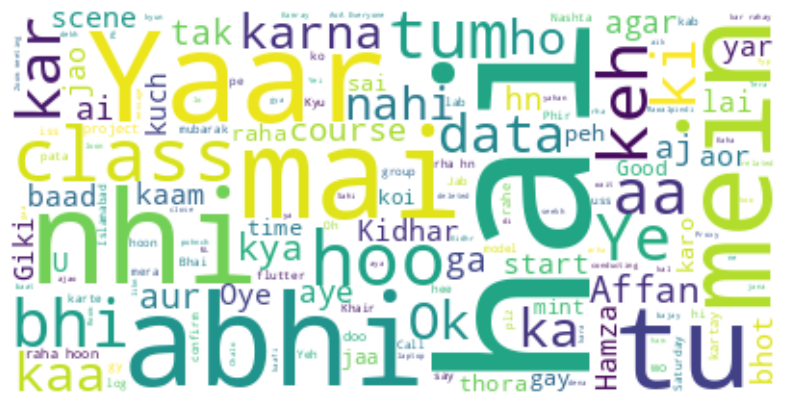

In [97]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [98]:
df.shape[0]

363

In [123]:
df[df['username']!='Affan Ali Giki' & df['username']!='Hamza Wajid']

TypeError: ignored

In [117]:
df1=df
rows_to_remove = []
for i in range(1, len(df1)):
     if  df1['username'].iloc[i] == df1['username'].iloc[i - 1]:
      df1.at[i, 'message'] = df1['message'].iloc[i - 1] + ' ' + df1['message'].iloc[i]
      rows_to_remove.append(df1.index[i - 1])

# Drop the rows marked for removal
df1 = df1.drop(index=rows_to_remove).reset_index(drop=True)

# Display the updated DataFrame
print(df1)

TypeError: ignored

In [116]:
print(df['message'][1:10]+"   "+df1['message'][1:10])

1                                                   NaN
2                                                   NaN
3     Thanks yaar   Mein abhi raste per hn Giki hi a...
4                                                   NaN
5     Keh tu rahay hai nhi hai Giki hi aa rha hn Nas...
6     Giki hi aa rha hn Nashta kiya hai? Mein abhi r...
7                          Keh tu rahay hai nhi hai   ?
8     Giki hi aa rha hn Nashta kiya hai? Mein abhi r...
9      Mein abhi raste per hn Giki hi aa rha hn   U up?
10                                                  NaN
11                                                  NaN
12                                                  NaN
Name: message, dtype: object


In [103]:
df.to_csv('Chat_with_affan.csv')

In [ ]:
# Initialize variables to store the dataset
dataset = []

# Initialize variables to keep track of the context and instruction
context = []
instruction = None
response = None
for row in df:
  message=row['message']
